# Logistic Regression Explanations

## Import main libraries

In [73]:
import numpy as np
import pandas as pd
import plotly.express as px

## Load the Data

In [74]:
data = pd.read_csv('/content/Social_Network_Ads.csv')

In [75]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## EDA

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [77]:
data.isna().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [78]:
data['Age'].value_counts()

,count
Age,
35,32
37,20
26,16
42,16
41,16
39,15
40,15
48,14
47,14


In [79]:
data['EstimatedSalary'].value_counts()

,count
EstimatedSalary,
72000,12
80000,11
79000,10
75000,9
71000,9
...,...
99000,1
129000,1
46000,1


In [80]:
data['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [81]:
corrMatrix = data.corr()    # No multicollinearity between the features ( Age , EstimatedSalary )

corrMatrix

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [82]:
fig = px.imshow(corrMatrix, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout(title='Correlation Matrix' , width = 600 , height = 500 )
fig.show()

## Data Preprocessing

### Handle The Missing Data

     ✅ No missing Data

## Encoding The Categorical Variables

      ✅ No categorical variables

## Spliting The Data Into Input & Output

In [83]:
x = data.drop('Purchased', axis=1).copy()
y = data['Purchased'].copy()

In [84]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [85]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


## Splitting The Data Into Training & Testing Sets

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train , x_test , y_train , y_test = train_test_split( x, y, test_size= 0.2 , random_state= 42 )

In [88]:
x_train.head()

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000


In [89]:
y_train.head()

,Purchased
3,0
18,1
202,1
250,0
274,1


In [90]:
x_test.head()

,Age,EstimatedSalary
209,46,22000
280,59,88000
33,28,44000
210,48,96000
93,29,28000


In [91]:
y_test.head()

,Purchased
209,0
280,1
33,0
210,1
93,0


## Feature Scaling

      ✅ In Logistic Regression we have to apply Feature Scaling because as we know that Logistic Regression is depending on The
      
      Regression EQN ▶ Y = bo + b1x1 + b2x2 + ... so to get the weights and the intercept , it has to apply calculations

      depending on this equation , if it see high values in a feature , it will feel that this feature is more important than

      the other features which is wrong ❎ so that we have to make the whole features have values in the same range to estimate

      the weight efficiently ✅

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
SC = StandardScaler()

In [94]:
x_train = SC.fit_transform( x_train )
x_test  = SC.transform    ( x_test  )

In [95]:
x_train

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [96]:
x_test

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886],
       [-0.96863208, -0.76450736],
       [ 0.99377543,  0.74814454],
       [-0.87051171, -1.22993871],
       [-0.77239133, -0.24089709],
       [ 0.89565505,  1.06812859],
       [-0.87051171,  0.36998156],
       [ 0.20881242,  0.13726589],
       [ 0.40505317, -0.15362871],
       [-0.28178945, -0.15362871],
       [ 1.4843773 , -1.05540195],
       [-1.45923396, -0.64814952],
       [-1.75359508, -1.37538601],
       [-0.77239133,  0.4863394 ],
       [-0.28178945,  1.09721805],
       [ 1.38625693, -0.93904411],
       [ 0.79753468,  0.10817643],
       [ 0.11069205, -0.82268628],
       [ 1.77873843, -0.29907601],
       [-1.55735433, -1.25902817],
       [-0.87051171,  0.28271318],
       [ 0.89565505, -1.37538601],
       [ 2.07309956,  0.16635535],
       [-1.85171546, -1.49174384],
       [ 1.28813655, -1.37538601],
       [ 0.40505317,  0.28271318],
       [-0.0855487 , -0.50270222],
       [ 1.68061805,

## Feature Selection

      ❗ It's the most important phase in Logistic Regression , Because Logistic Regression is highly affected by the

      multicollinearity❌ between the features , to estimate the coefficients effeciently to know which feature is used to

      predict this y value so that no overlapping happens , so that if there is a highly correlated features , we have to get

      the best of them and get rid of the others


      ▶ In the EDA use the correlation matrix✅ to see if there is a highly correlated features , then here in Feature Selection

      phase , there are some methods we can use to choose the best Features

## Model Training

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
classifier = LogisticRegression()

classifier.fit( x_train , y_train )      # y = -0.99504916 + 1.96509784 age + 1.13509021 EstimatedSalary  ->  h(y) = 1 / 1 + e^(-y)

LogisticRegression()

In [99]:
print ( classifier.intercept_ , '\n' )
print ( classifier.coef_ )

[-0.99504916] 

[[1.96509784 1.13509021]]


.

## Model Testing

In [100]:
YPredicted = classifier.predict( x_test )

In [101]:
YPredicted

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

## Model Evaluation

In [102]:
from sklearn.metrics import confusion_matrix , accuracy_score

### Training Evaluations

In [103]:
yTrainPredicted = classifier.predict( x_train )
TrainingResults = pd.DataFrame(  SC.inverse_transform ( x_train ) , columns= x.columns )
TrainingResults['ActualY']    = y_train.reset_index(drop=True)
TrainingResults['PredictedY'] = yTrainPredicted

TrainingResults.head( 10 )

,Age,EstimatedSalary,ActualY,PredictedY
0,27.0,57000.0,0,0
1,46.0,28000.0,1,0
2,39.0,134000.0,1,1
3,44.0,39000.0,0,0
4,57.0,26000.0,1,1
5,32.0,120000.0,1,0
6,41.0,52000.0,0,0
7,48.0,74000.0,1,1
8,26.0,86000.0,0,0
9,22.0,81000.0,0,0


In [104]:
cmTrain = confusion_matrix( y_train , yTrainPredicted )

cmTrain

array([[190,  15],
       [ 36,  79]])

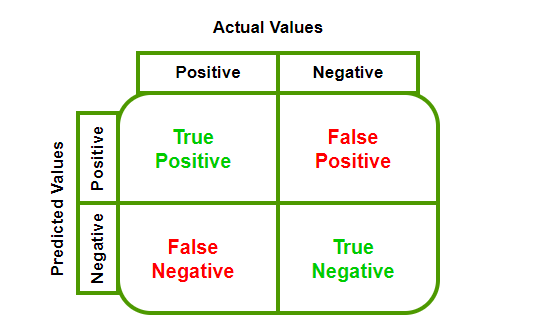

     ✅ The confustion matrix shows how many zeros and ones i predicted right and how many i predicted false

        Here i predicted 190 zero true and 79 ones true , and predicted 15 as zero but they were 1 and 36 as 1 and they were 0

        ▶ Positive = 0
        
        ▶ Negative = 1

In [105]:
TrainindScore = accuracy_score ( y_train , yTrainPredicted )    # accuracy_score =  No. of right prediction / whole predictions

print ( f"{ round(TrainindScore * 100 , 2) }%" )

84.06%


In [106]:
import plotly.graph_objects as go

# Create the scatter plot for training results
fig = px.scatter(
    TrainingResults,
    x='Age',
    y='EstimatedSalary',
    color='ActualY',
    title='Training Results with Decision Boundary',
    color_continuous_scale=px.colors.sequential.RdBu,
    labels={'ActualY': 'Purchased'}
)

# Generate decision boundary
# Define the min and max for 'Age' and 'EstimatedSalary' from the original (unscaled) training data
age_min, age_max = TrainingResults['Age'].min() - 1, TrainingResults['Age'].max() + 1
salary_min, salary_max = TrainingResults['EstimatedSalary'].min() - 1000, TrainingResults['EstimatedSalary'].max() + 1000

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(age_min, age_max, 0.1), np.arange(salary_min, salary_max, 100))

# Prepare the meshgrid points for prediction by scaling them
Z_scaled = SC.transform(np.c_[xx.ravel(), yy.ravel()])

# Predict the class for each point in the meshgrid
Z = classifier.predict(Z_scaled)

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Add the contour plot for the decision boundary
fig.add_trace(go.Contour(
    x=xx[0],
    y=yy[:, 0],
    z=Z,
    showscale=False,
    colorscale=[[0, 'blue'], [1, 'red']],
    opacity=0.3,
    name='Decision Boundary',
    #hoverinfo='none'
))

fig.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



## Testing Evaluation

In [107]:
TestingResults = pd.DataFrame(  SC.inverse_transform ( x_test ) , columns= x.columns )
TestingResults['ActualY']    = y_test.reset_index(drop=True)
TestingResults['PredictedY'] = YPredicted

TestingResults.head( 10 )

,Age,EstimatedSalary,ActualY,PredictedY
0,46.0,22000.0,0,0
1,59.0,88000.0,1,1
2,28.0,44000.0,0,0
3,48.0,96000.0,1,1
4,29.0,28000.0,0,0
5,30.0,62000.0,0,0
6,47.0,107000.0,1,1
7,29.0,83000.0,0,0
8,40.0,75000.0,0,0
9,42.0,65000.0,0,0


In [108]:
cm2 = confusion_matrix( y_test , YPredicted )

cm2

array([[50,  2],
       [ 9, 19]])

In [109]:
testingScore = accuracy_score ( y_test , YPredicted )

print ( f"{ round(testingScore * 100 , 2) }%" )

86.25%


In [110]:
import plotly.graph_objects as go

# Create the scatter plot for testing results
fig = px.scatter(
    TestingResults,
    x='Age',
    y='EstimatedSalary',
    color='ActualY',
    title='Testing Results with Decision Boundary',
    color_continuous_scale=px.colors.sequential.RdBu,
    labels={'ActualY': 'Purchased'}
)

# Generate decision boundary
# Define the min and max for 'Age' and 'EstimatedSalary' from the original (unscaled) testing data
age_min, age_max = TestingResults['Age'].min() - 1, TestingResults['Age'].max() + 1
salary_min, salary_max = TestingResults['EstimatedSalary'].min() - 1000, TestingResults['EstimatedSalary'].max() + 1000

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(age_min, age_max, 0.1), np.arange(salary_min, salary_max, 100))

# Prepare the meshgrid points for prediction by scaling them
Z_scaled = SC.transform(np.c_[xx.ravel(), yy.ravel()])

# Predict the class for each point in the meshgrid
Z = classifier.predict(Z_scaled)

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Add the contour plot for the decision boundary
fig.add_trace(go.Contour(
    x=xx[0],
    y=yy[:, 0],
    z=Z,
    showscale=False,
    colorscale=[[0, 'blue'], [1, 'red']],
    opacity=0.3,
    name='Decision Boundary',
    #hoverinfo='none'
))

fig.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

